# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import StandardScaler

# Ingest Data  

In [5]:
df = pd.read_excel('World military power.xlsx', header = 1, index_col= None).rename(index = lambda x: x+1)
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [7]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Total Coastline Coverage                   29
Submarine Fleet Strength                   23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Aircraft Carrier Fleet Strength value      23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage                       9
Total Border Coverage value                 9
Attack Helicopter Fleet Strength            0
Available Manpower                          0
External Debt value                         0
Airport Totals                              0
Airport Totals value                        0
Oil Production                              0
Oil Production value                        0
Oil Consumption                   

In [8]:
pd.set_option('display.max_rows', 500)

In [9]:
df.isnull().sum()/len(df)*100


Military Strength                           0.000000
Military Strength Power Index               0.000000
Aircraft Strength                           0.000000
Aircraft Strength value                     0.000000
Fighter/Interceptor Strength                0.000000
Fighter/Interceptor Strength value          0.000000
Attack Aircraft Strength                    0.000000
Attack Aircraft Strength value              0.000000
Transport Aircraft Fleet Strength           0.000000
Transport Aircraft Fleet Strength value     0.000000
Trainer Aircraft Fleet                      0.000000
Trainer Aircraft Fleet value                0.000000
Helicopter Fleet Strength                   0.000000
Helicopter Fleet Strength value             0.000000
Attack Helicopter Fleet Strength            0.000000
Attack Helicopter Fleet Strength value      0.000000
Tank Strength                               0.000000
Tank Strength value                         0.000000
AFV/APC Strength                            0.

## Implement basic steps to see how is your data looks like

## Convert multi index columns to one level

In [10]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


## Detect and drop duplicated columns

In [11]:
df.duplicated().any()

False

In [12]:
df.shape[1]

60

In [13]:
df.rename(columns={'Military Strength': 'Country'}).head(1)

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0


In [14]:
df.select_dtypes('object').head()

,Military Strength,Aircraft Strength,Fighter/Interceptor Strength,Attack Aircraft Strength,Transport Aircraft Fleet Strength,Trainer Aircraft Fleet,Helicopter Fleet Strength,Attack Helicopter Fleet Strength,Tank Strength,AFV/APC Strength,...,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage
1,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan
2,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,...,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania
3,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,...,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria
4,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,...,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola
5,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina


In [15]:
df['defense spending budget value'] = df['defense spending budget value'].str.replace(',','').astype('int64')

In [16]:
df['External Debt value'] = df['External Debt value'].str.replace(',','').astype('int64')

In [17]:
df['Oil Production value'] = df['Oil Production value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [18]:
df['Oil Consumption value'] = df['Oil Consumption value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [19]:
df['Proven Oil Reserves value'] = df['Proven Oil Reserves value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [20]:
df['Available Manpower value'] = df['Available Manpower value'].str.replace(',','').astype('int64')

In [21]:
df['Total Population value'] = df['Total Population value'].str.replace(',','').astype('int64')

In [22]:
df['Total Square Land Area value'] = df['Total Square Land Area value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [23]:
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [24]:
df['Total Waterway Coverage value'] = df['Total Waterway Coverage value'].apply(lambda x:str(x).replace(',','')).astype('float64')

In [25]:
drop_columns = df.select_dtypes('object').head(5).iloc[:,1:].columns

In [26]:
df.drop(drop_columns, axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [28]:
df.rename(columns={'Military Strength': 'Country'}, inplace=True)

## Check for missing values 

In [29]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [30]:
for k in df.columns:
    if df[k].isnull().sum() > 0:
        print(f'{k:<48} : {df[k].isnull().sum()}')

Navy Fleet Strengths value                       : 14
Aircraft Carrier Fleet Strength value            : 23
Submarine Fleet Strength value                   : 23
Destroyer Fleet Strength value                   : 23
Frigate Fleet Strength value                     : 23
Total Coastline Coverage value                   : 29
Total Border Coverage value                      : 9


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

<p style = 'color : green ; font-size: 20px'>Navy Fleet Strengths value </p>

In [31]:
df[df['Navy Fleet Strengths value'].isnull()]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
17,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.000000e+00,962617,2249104,581730.0,NaN,0.0,4347.0
20,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.000000e+00,7800000,19742715,274200.0,NaN,0.0,3611.0
24,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.000000e+00,2348581,5745062,622984.0,NaN,2800.0,5920.0
25,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,...,59.0,128000.0,100000.0,1.500000e+09,6030834,15833116,1284000.0,NaN,0.0,6406.0
31,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,...,128.0,2000.0,200000.0,1.500000e+07,5011174,10686269,78867.0,NaN,664.0,2046.0
39,Ethiopia,0.8581,86.0,24.0,0.0,9.0,20.0,33.0,8.0,400.0,...,57.0,0.0,55000.0,4.280000e+05,41143474,108386391,1104300.0,NaN,104300.0,5925.0
49,Hungary,0.8215,47.0,12.0,0.0,5.0,6.0,24.0,8.0,30.0,...,41.0,14000.0,145000.0,2.510000e+07,4618081,9825704,103000.0,NaN,1622.0,2106.0
63,Kyrgyzstan,1.9244,5.0,0.0,0.0,0.0,0.0,5.0,2.0,150.0,...,28.0,1000.0,17200.0,4.000000e+07,3029935,5849296,199951.0,NaN,600.0,4573.0
72,Mali,1.8941,29.0,9.0,0.0,6.0,5.0,8.0,6.0,80.0,...,25.0,0.0,5500.0,0.000000e+00,5991557,18429893,1240192.0,NaN,0.0,7908.0
75,Moldova,2.1291,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,7.0,0.0,16320.0,0.000000e+00,2014503,3437720,33851.0,NaN,558.0,1885.0


In [32]:
df = df.fillna(df.mean())


In [33]:
df.isnull().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [35]:
pd.DataFrame(df.columns, index=range(1,df.shape[1]+1), columns=['Columns'])

,Columns
1,Country
2,Military Strength Power Index
3,Aircraft Strength value
4,Fighter/Interceptor Strength value
5,Attack Aircraft Strength value
6,Transport Aircraft Fleet Strength value
7,Trainer Aircraft Fleet value
8,Helicopter Fleet Strength value
9,Attack Helicopter Fleet Strength value
10,Tank Strength value


In [36]:
df.drop(columns=['Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], inplace=True)

## Visualy inspect the some features

<AxesSubplot:>

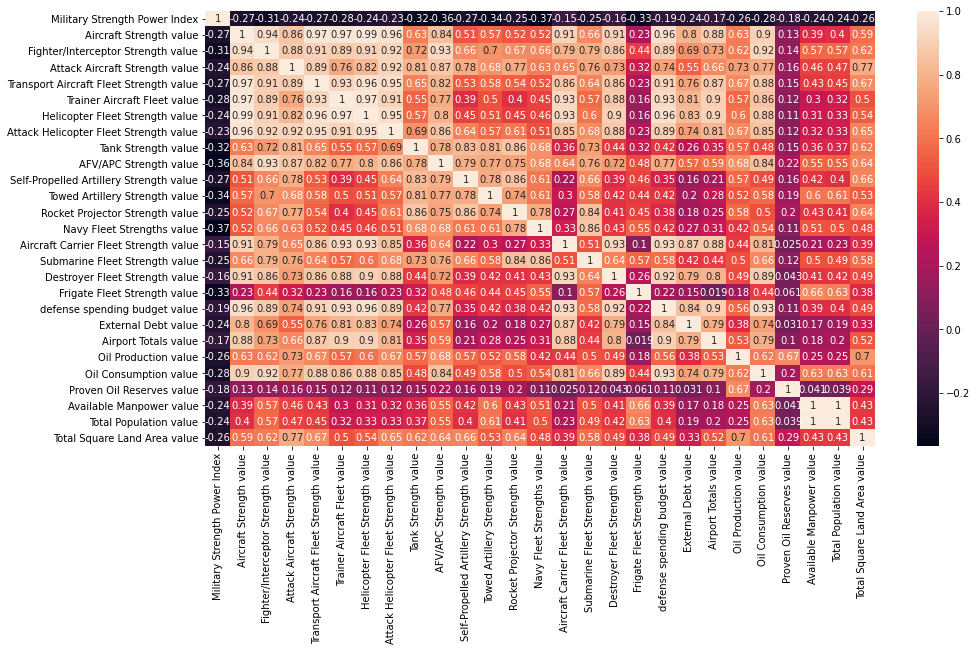

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [38]:
df.shape

(138, 28)

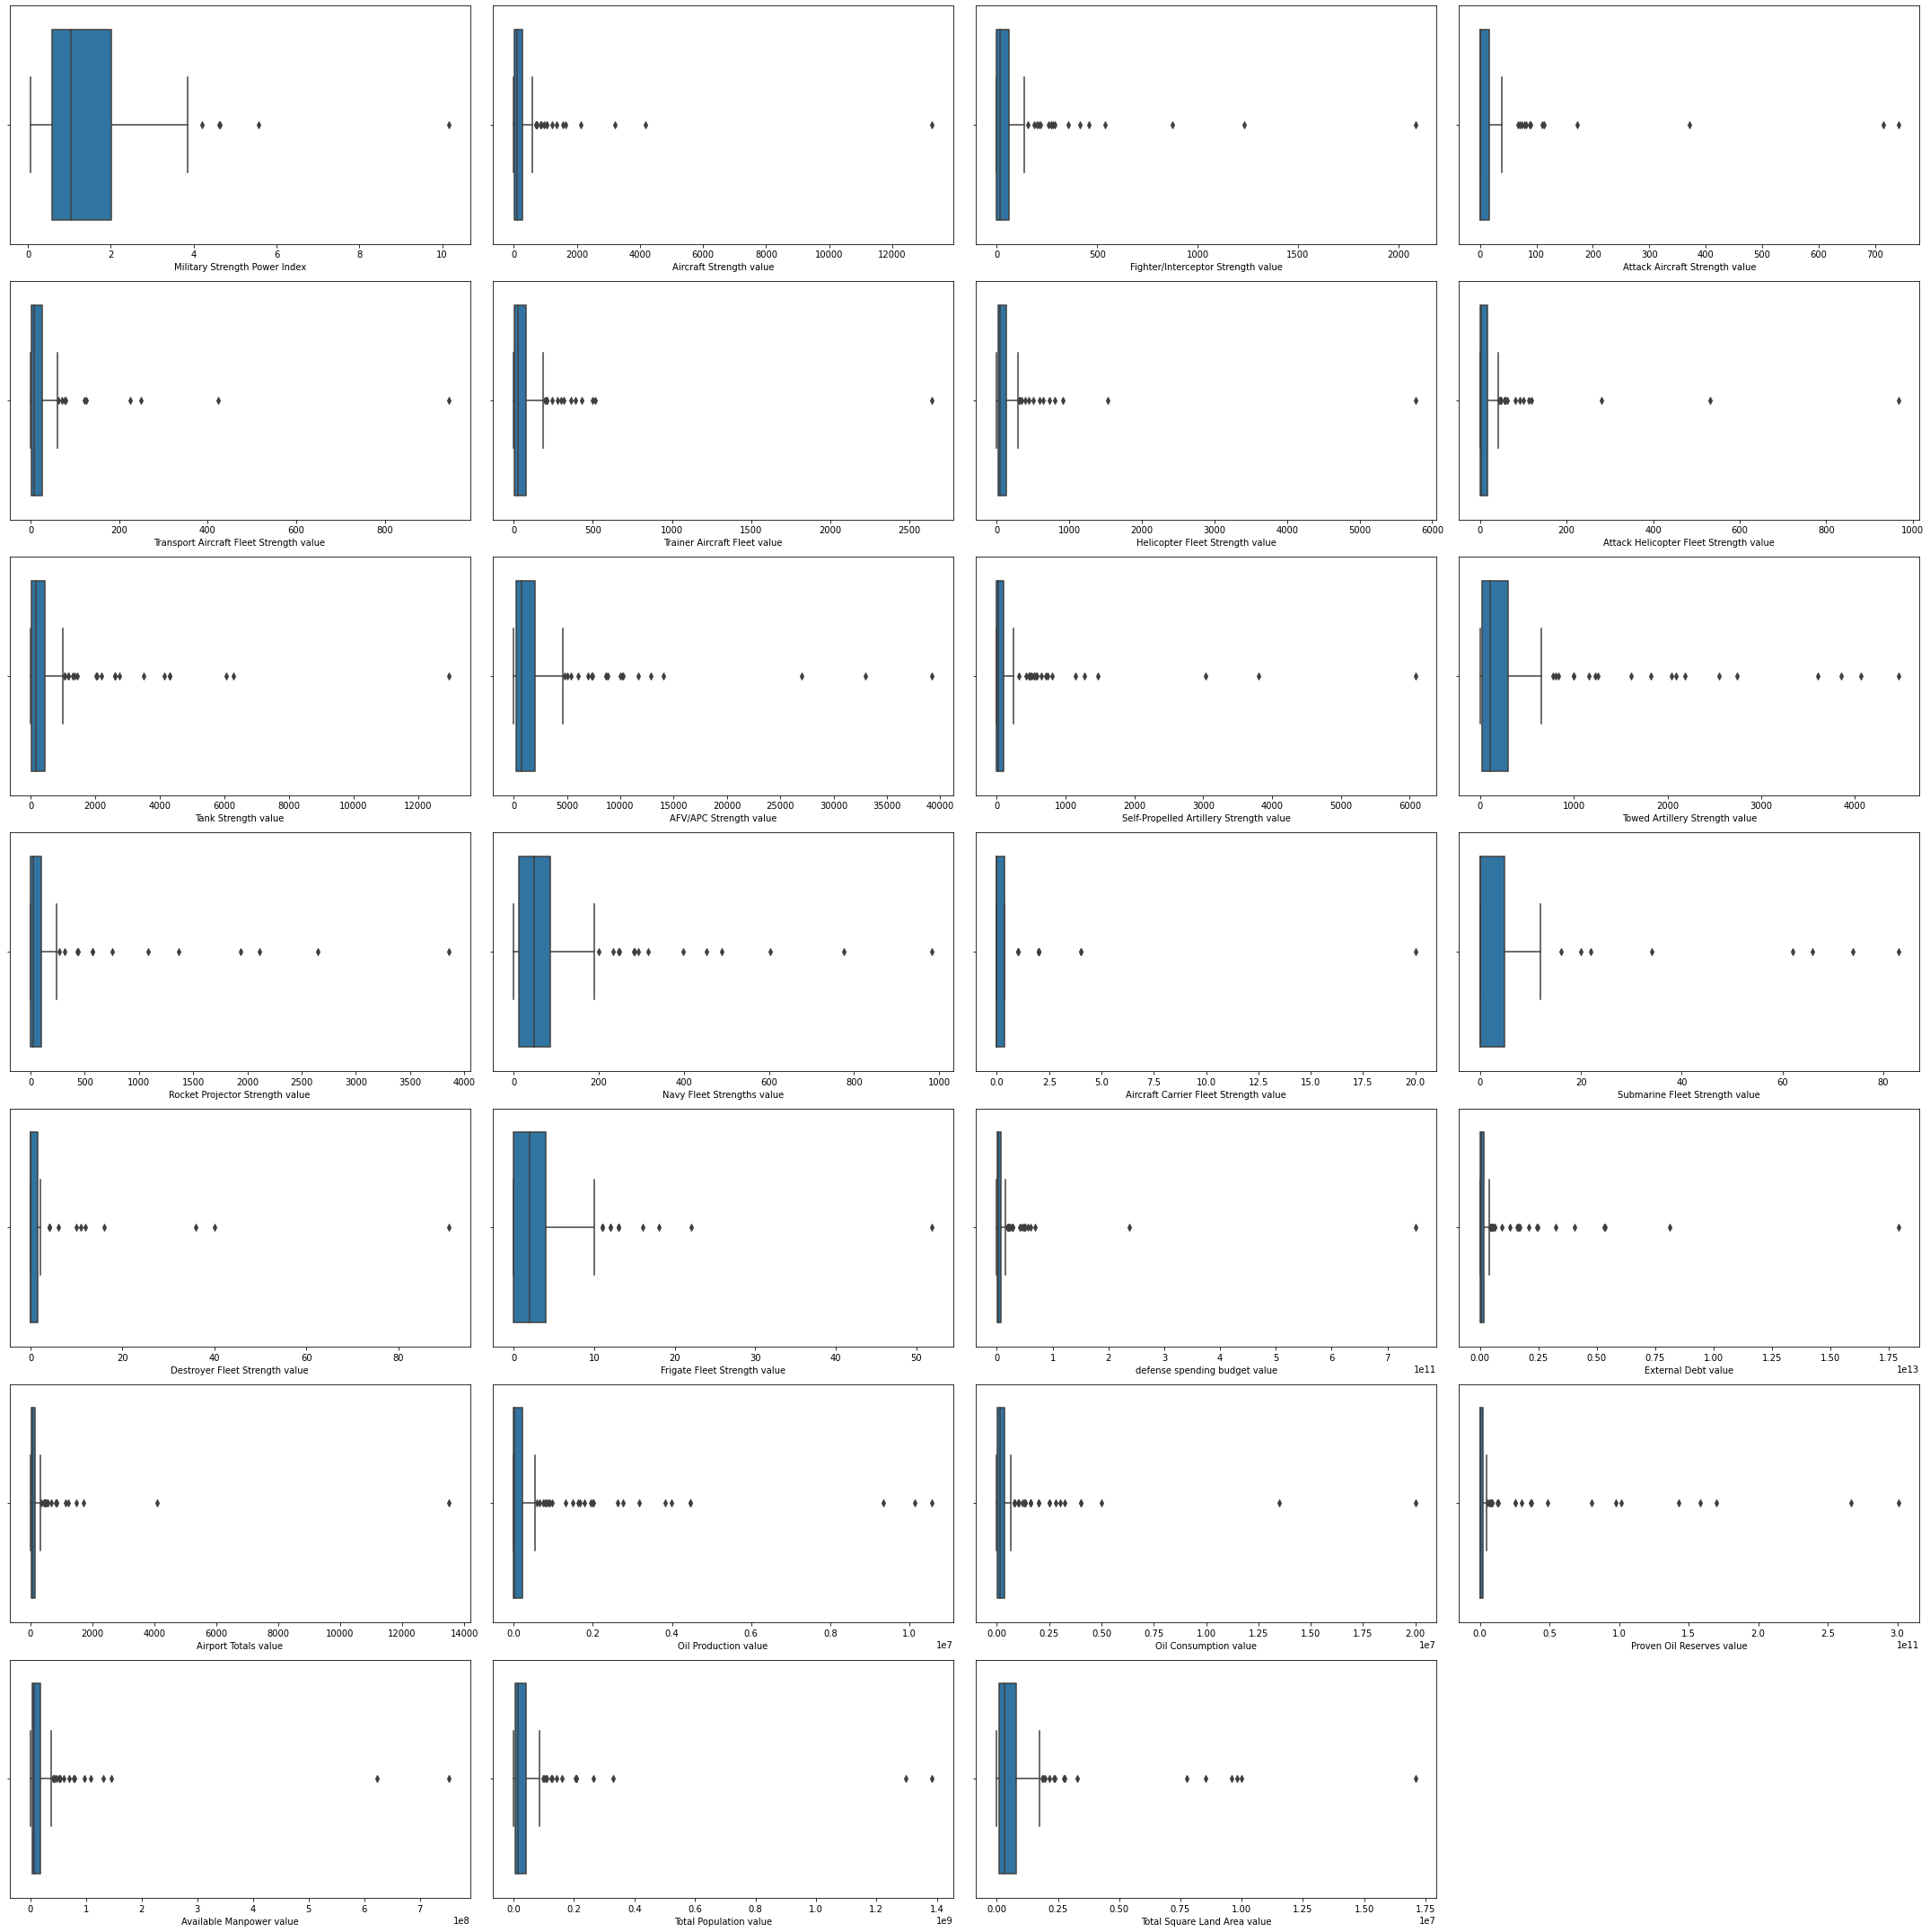

In [39]:
plt.figure(figsize=(30,30))
index = 0
for column in df.columns[1:]:
    index += 1
    plt.subplot(7,4,index)
    sns.boxplot(x=df[column])
plt.tight_layout()

## Decriptive statistics

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


# Data Preprocessing

In [41]:
X = df.iloc[:,1:]

In [42]:
X.shape

(138, 27)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_scaled = scaler.fit_transform(X)

# Modelling

In [46]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [47]:
K_means_model.fit_predict(X_scaled)

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 2, 2, 2])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [48]:
#pip install numpy==1.20.3

In [49]:
#pip install pyclustertend

In [50]:
from pyclustertend import hopkins

In [51]:
hopkins(X_scaled, X_scaled.shape[0])

0.0786635090725987

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [60]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

### Model Building and label visualisation

Text(0.5, 1.0, 'elbow method')

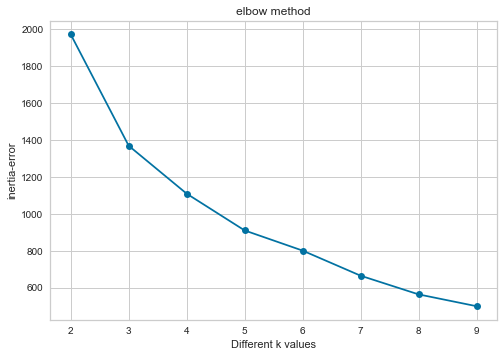

In [61]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

### Evaluate 

In [62]:
pd.Series(ssd).diff()

0           NaN
1   -603.720625
2   -259.815879
3   -199.318035
4   -109.331493
5   -136.039119
6   -101.274797
7    -64.131170
dtype: float64

In [63]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,603.720625
3,259.815879
4,199.318035
5,109.331493
6,136.039119
7,101.274797
8,64.131170


<AxesSubplot:>

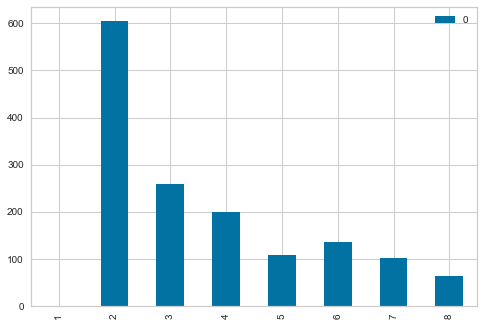

In [64]:
df_diff.plot(kind='bar')

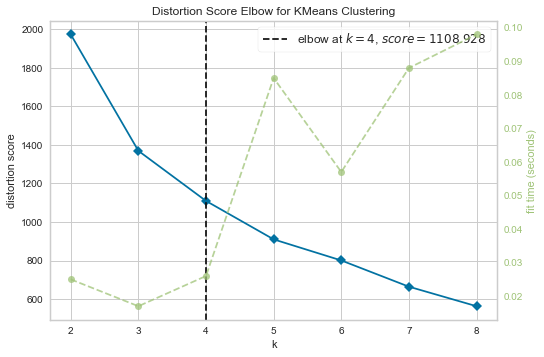

In [59]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

In [58]:
from sklearn.metrics import silhouette_score

In [65]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8622756034577878
For n_clusters=3, the silhouette score is 0.8164977749308419
For n_clusters=4, the silhouette score is 0.4980582697802635
For n_clusters=5, the silhouette score is 0.466659257465213
For n_clusters=6, the silhouette score is 0.4688968334980011
For n_clusters=7, the silhouette score is 0.45826036911736234
For n_clusters=8, the silhouette score is 0.4470977614024494


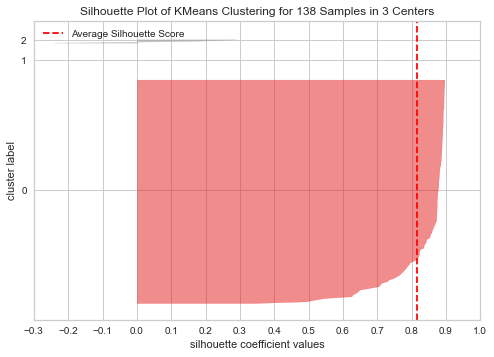

In [66]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [85]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [86]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

## Hierarchical Clustering

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [70]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

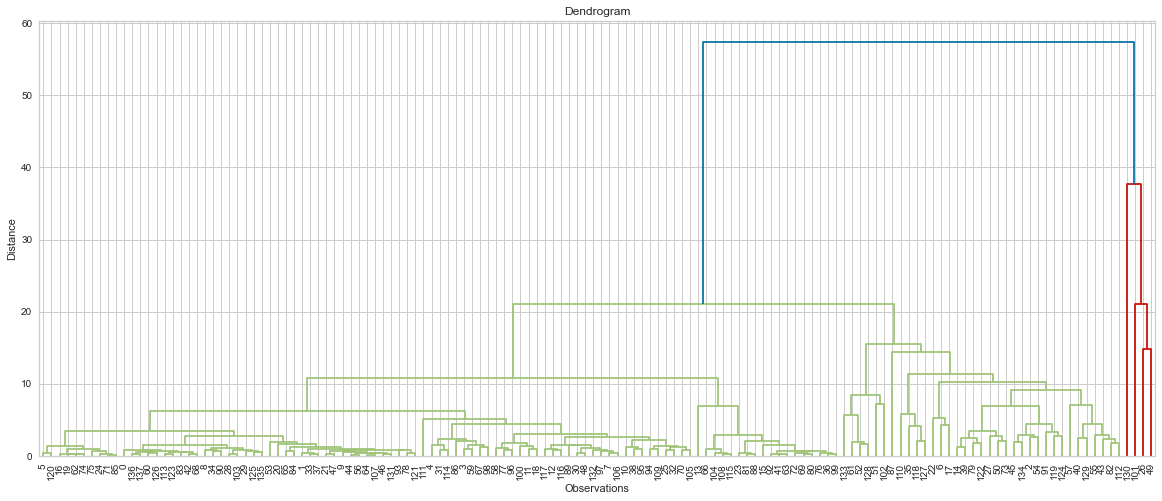

In [71]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

### Model Building and label visualisation

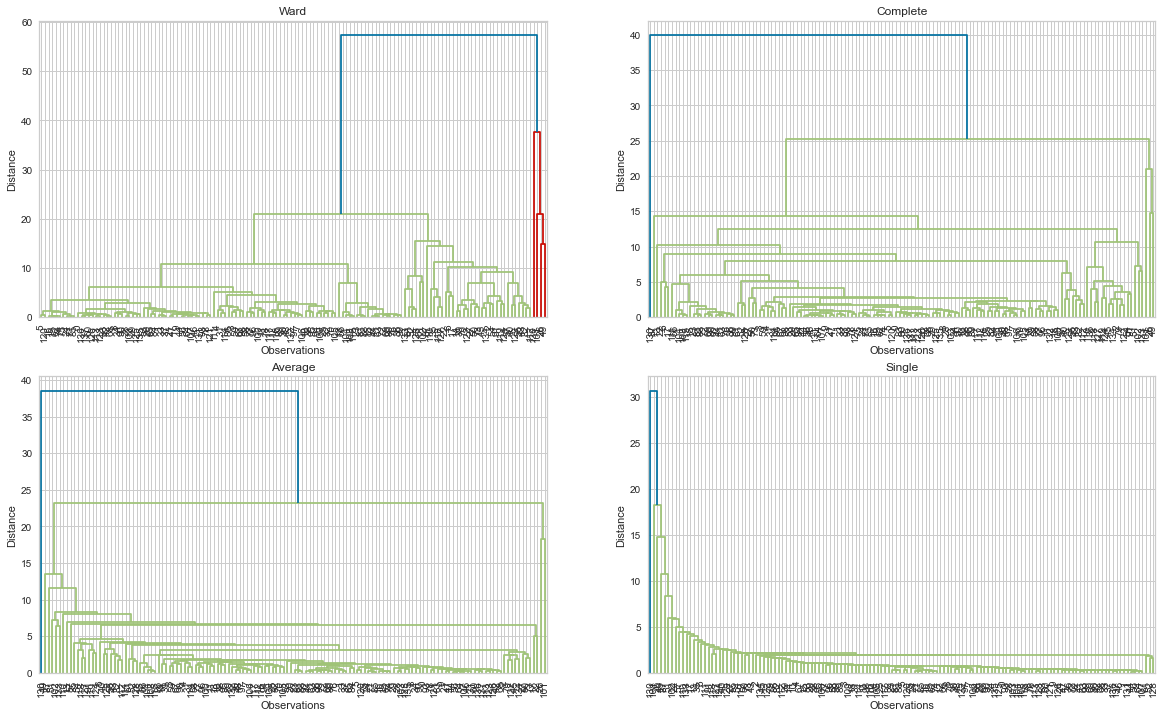

In [72]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Evaluate 

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.8435361212143885
Silhouette Score for 3 clusters: 0.8164977749308419
Silhouette Score for 4 clusters: 0.4263927318439525
Silhouette Score for 5 clusters: 0.42629251812075664
Silhouette Score for 6 clusters: 0.42919946977362156
Silhouette Score for 7 clusters: 0.4288618674708675
Silhouette Score for 8 clusters: 0.4203987136942069
Silhouette Score for 9 clusters: 0.4126420469700651


In [76]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
model.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [89]:
K_means_pred = pd.DataFrame(model.labels_,columns=['K_means'])
K_means_pred.head()

,K_means
0,0
1,0
2,0
3,0
4,0


In [83]:
Hier_pred = pd.DataFrame(model1.labels_, columns=['Hier'])
Hier_pred.head()

,Hier
0,0
1,0
2,0
3,0
4,0


In [90]:
pd.concat([K_means_pred,Hier_pred], axis=1)

,K_means,Hier
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


<AxesSubplot:xlabel='K_means', ylabel='Hier'>

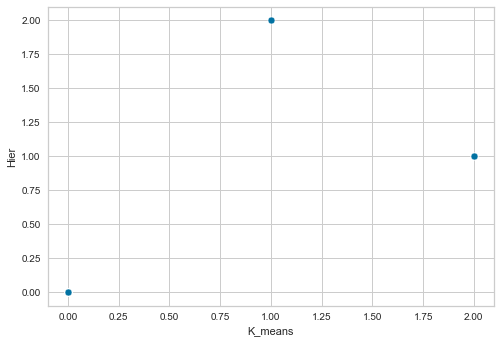

In [93]:
sns.scatterplot(x=K_means_pred.iloc[:,0], y=Hier_pred.iloc[:,0])